In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import base64

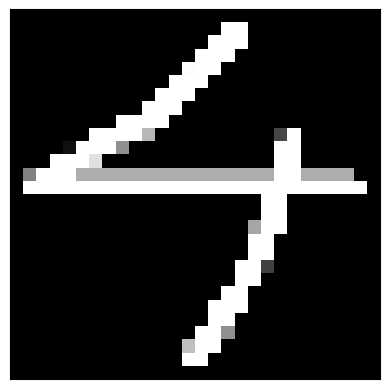

In [35]:
# 画像を読み込む
img = cv2.imread('./received_image.png')

### 数字(1つ)を切り出す，位置は不定，切り出しの際は余白をつけ，28x28にリサイズする
# グレースケールに変換
img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 2値化
img_bi = cv2.threshold(img_gr, 100, 255, cv2.THRESH_BINARY_INV)[1]
# 輪郭抽出
contours, hierarchy = cv2.findContours(img_bi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 輪郭の面積を計算
areas = list(map(cv2.contourArea, contours))
# 面積が最大の輪郭を抽出
cnt = [contours[np.argmax(areas)]]
# 輪郭を囲む長方形を計算
x, y, w, h = cv2.boundingRect(cnt[0])
# 長方形の左上の座標を計算
x1 = x - 10
y1 = y - 10
# 長方形の右下の座標を計算
x2 = x + w + 10
y2 = y + h + 10
# 長方形を描画
cv2.rectangle(img_bi, (x1, y1), (x2, y2), (0, 0, 255), 1)
# 長方形で切り出し
img = img_bi[y1:y2, x1:x2]
# リサイズ
try:
    img = cv2.resize(img, (28, 28))
except:
    img = cv2.resize(img_bi, (28, 28))

# 画像を表示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# 目盛りを消す
plt.xticks([]), plt.yticks([])
plt.show()


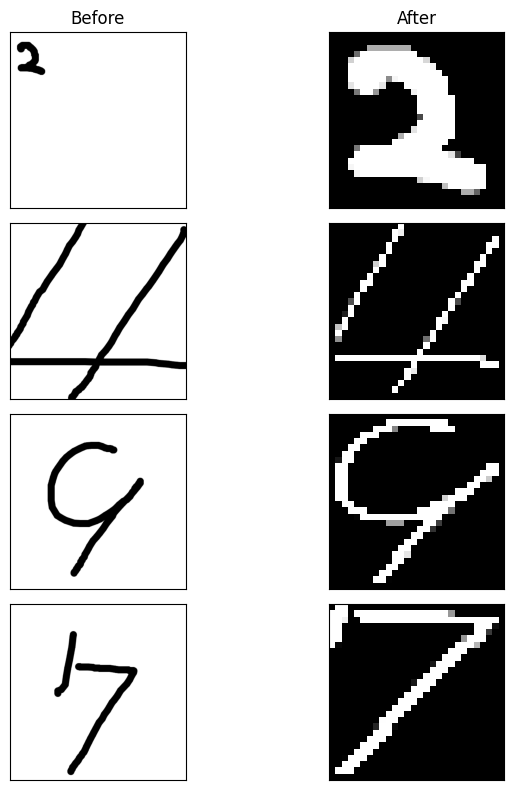

In [5]:
# 数字をまとめて表示
plt.figure(figsize=(8, 8))
for i in range(4):
    base_im = cv2.imread(f'../imgs_ch4/t{i+1}.png')
    cut_im = cv2.imread(f'../imgs_ch4/t{i+1}t.png')
    plt.subplot(4, 2, 2*i+1)
    if i == 0:
        plt.title('Before')
    plt.imshow(cv2.cvtColor(base_im, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.subplot(4, 2, 2*i+2)
    if i == 0:
        plt.title('After')
    plt.imshow(cv2.cvtColor(cut_im, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.savefig('../imgs_ch4/fig4-3.png')
plt.show()